# Trabalho 1
### SME0202 - Métodos Numéricos para Equações Diferenciais
##### Aluno: Caio Assumpção Rezzadori
##### Nº USP: 11810481

In [262]:
#Importando bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [575]:
#Função que dá o tamanho da malha de acordo com o tamanho de h escolhido
def M(h):
    return(int(2/h) - 1)

#Função que calcula o valor aproximado da função nos pontos de discretização da malha
def U(h):
    
    #Tamanho da malha 
    m = int(2/h - 1) + 2

    #Matriz identidade
    I = np.identity(m)

    #Matriz com condições de Dirichlet
    D_h = np.identity(m)*(h**2)

    #Matriz auxiliar 1
    I_1 = np.identity(m)
    I_1[0][0] = 0
    I_1[-1][-1] = 0

    #Matriz auxiliar 2
    I_2 = np.zeros((m, m))

    #Matriz auxiliar 1
    I_h = np.zeros((m, m))
    I_h[0][0] = h/2
    I_h[-1][-1] = h/2
    I_h += I_1

    #Matriz T com condições de Neumann e com coeficientes do Método de diferenças finitas
    T = np.zeros((m, m))
    T[0][0] = -2*h
    T[-1][-1] = -2*h
    T[0][1] = h
    T[-1][-2] = h

    for i in range(1, m - 1):
        T[i][i - 1] = 1
        T[i][i] = -4
        T[i][i + 1] = 1

        I_2[i][i - 1] = 1
        I_2[i][i + 1] = 1

    #Transformando as matrizes criadas em matrizes esparsas
    I = sparse.csr_matrix(I)
    I_1 = sparse.csr_matrix(I_1)
    I_2 = sparse.csr_matrix(I_2)
    T = sparse.csr_matrix(T)
    D_h = sparse.csr_matrix(D_h)

    #Matriz A de resolução do problema linear (A linha)
    A = sparse.kron((I - I_1), D_h) + sparse.kron(I_1, T) + sparse.kron(I_2, I_h)
    A = (1/h**2)*A


    #Matriz auxiliar para a resolução do sistema linear
    aux = np.identity(m)*10
    aux[0][0] = (1/2)*(1 + 10*h)
    aux[-1][-1] = (1/2)*(1 + 10*h)
    aux = sparse.csr_matrix(aux)

    #Matriz B utilizada para isolar as incógnitas e resolver o sistema linear
    B = sparse.kron(I_1, aux) 

    #Matriz A final para a resolução do sistema linear
    A = A - B

    F = np.zeros((m**2, 1))
    F[0 : m] = 1

    F = sparse.csr_matrix(F)


    return(sparse.linalg.spsolve(A, F))

### Solução de referência:
### $h = \dfrac{1}{256} \hspace {1cm}m + 1 = 512$

In [576]:
#Cálculo da solução de referência
h_barra = 1/256
m = M(h_barra)
valores_referencia = U(h_barra)#[(U(h) != 0)&(U(h) != 1)]

valores_referencia

array([1., 1., 1., ..., 0., 0., 0.])

In [577]:
valores_referencia[valores_referencia==1].shape

(513,)

Text(0.5, 0, 'U')

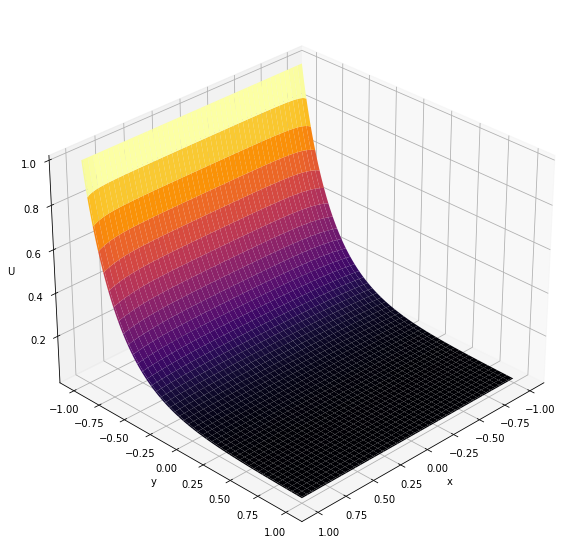

In [471]:
#Plotagem dos valores de referência
x = range(1, m)
y = range(1, m)
X, Y = np.meshgrid(x,y)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

ax.plot_surface((2*X - m)/m,(2*Y - m)/m, valores_referencia[X + m*(Y - 1)], cmap = 'inferno')
ax.view_init(30, 45)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')

In [578]:
valores_referencia.shape

(263169,)

### Cálculo dos valores discretizados em 5 malhas diferentes

In [581]:
#Vetor dos valores de h
h = [1/2, 1/4, 1/8, 1/64, 1/128]
malhas = []
valores_h = []

#Vetor de soluções para cada h
for i in h:
    malhas.append(M(i))
    valores_h.append(U(i))#[(U(i) != 0)&(U(i) != 1)])

### Cálculo do erro

In [597]:
#Vetor dos truncamentos dos valores da malha analisada e da malha da solução de referência
truncamento = []
for t in range(0, len(h)):
    #Indice geral da malha refinada (Solução de referência)
    k_barra = []

    #Índice geral da malha analisada
    k = []

    #Razão entre a divisão da malha analisada e da malha da solução de referência
    q = h[t]/h_barra

    for j in range(0, M(h[t]) + 2):
        for i in range(0, M(h[t]) + 2):
            k_barra.append(i*q + (M(h_barra) + 2)*j*q)
            k.append(i + (M(h[t]) + 2)*j*q)

    k_barra = np.array(k_barra)
    k_barra = k_barra.astype(int)
    
    #Variável auxiliar para retirar os zeros(Valores não calculados e sim dados pela condição de contorno de Dirichlet)
    aux = abs(valores_referencia[k_barra] - valores_h[t])
    truncamento.append(aux[aux != 0])

### Cálculo do erro

In [598]:
erro = []
for i in truncamento:
    erro.append(i.max())
erro

[0.03696247367803099,
 0.017551445672845445,
 0.007378972232522929,
 0.0007767824794359113,
 0.0003024652436087738]

In [656]:
#Gerando tabela de resultados
import pandas as pd
print(pd.DataFrame({'h': h, 'Erro':erro}).to_latex(index = False))

\begin{tabular}{rr}
\toprule
       h &     Erro \\
\midrule
0.500000 & 0.036962 \\
0.250000 & 0.017551 \\
0.125000 & 0.007379 \\
0.015625 & 0.000777 \\
0.007812 & 0.000302 \\
\bottomrule
\end{tabular}



<ipython-input-656-b3142326dec0>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame({'h': h, 'Erro':erro}).to_latex(index = False))


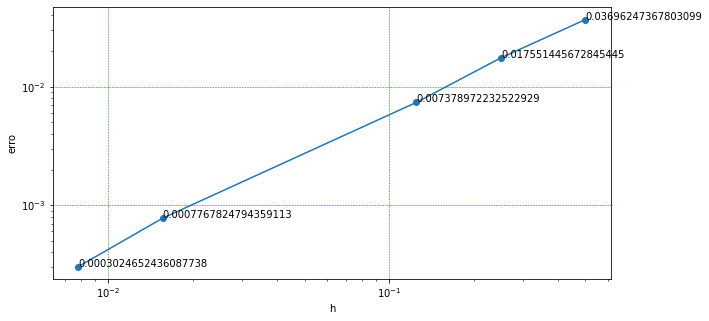

In [647]:
#Plotagem da convergência do método
fig = plt.figure(figsize = (10, 5))
ax = fig.subplots()
ax.plot(h, erro,  marker = 'o')
ax.loglog()
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5,)
ax.set_xlabel('h')
ax.set_ylabel('erro')
for i,j in zip(h,erro):
    ax.annotate(str(j),xy=(i, j))
plt.show()
